# **XOR Network** (from ab-initio)

In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Here is the XOR network architecture

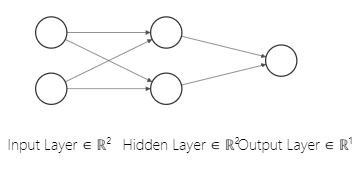

In [2]:
from IPython.display import Image
Image(filename="XORnetwork.png", width=600)

In [3]:
def initialize_parameters():
  # Initializing weight matrix and bias terms
  # Initializing weight values with random numbers from normal distribution
  # Intitializing bias term with 0

  W1 = np.random.randn(2, 2)
  W2 = np.random.randn(1, 2)
  b1 = np.zeros((2, 1))
  b2 = np.zeros((1, 1))

  parameters = {"W1" : W1, "b1": b1, "W2" : W2, "b2": b2}
  return parameters

In [4]:
def sigmoid(x):
  # This squeezes any given real number between 0 and 1
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  # Calculating derivative of sigmoid function
  return x*(1-x)

In [5]:
# Performing forward pass.
# This is estimating the output for the given input pair

def forward_propagation(X, y, parameters):

  W1 = parameters["W1"]
  W2 = parameters["W2"]
  b1 = parameters["b1"]
  b2 = parameters["b2"]

  # Write your code here
  # Calculate net1, O1, net2, O2




  # Calculate loss and return the values correctly
  cache = (net1, O1, W1, b1, net2, O2, W2, b2)
  # This is binary cross-entropy loss function
  log_probability = np.multiply(np.log(O2), y) + np.multiply(np.log(1 - O2), (1 - y))
  cost = -np.sum(log_probability) / X.shape[1]
  return cost, cache, O2

In [6]:
def backpropagation(X, y, cache):
  (net1, O1, W1, b1, net2, O2, W2, b2) = cache

  dnet2 = O2 - y
  dW2 = np.dot(dnet2, O1.T) / X.shape[1]
  db2 = np.sum(dnet2, axis = 1, keepdims = True)

  dO1 = np.dot(W2.T, dnet2)
  dnet1 = np.multiply(dO1, sigmoid_derivative(O1))
  dW1 = np.dot(dnet1, X.T) / X.shape[1]
  db1 = np.sum(dnet1, axis = 1, keepdims = True) / X.shape[1]

  gradients = {"dnet2": dnet2, "dW2": dW2, "db2": db2, "dnet1": dnet1, "dW1": dW1, "db1": db1}

  return gradients

In [13]:
def update_parameters(parameters, gradients, learning_rate):

  # Write your code here
  # Update the values in the parameters and return parameters





# All right, lets start training!

In [11]:
def model(epoch, learning_rate):
  X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
  y = np.array([[0, 1, 1, 0]]) # XOR output

  parameters = initialize_parameters()
  epochs = epoch
  learning_rate = learning_rate
  loss = np.zeros((epochs, 1))

  for i in range(epochs):
      loss[i, 0], cache, O2 = forward_propagation(X, y, parameters)
      gradients =backpropagation(X, y, cache)
      parameters = update_parameters(parameters, gradients, learning_rate)

  return parameters

# Try running with different combinations of epoch and leanring rate

In [18]:
# Hyper-parameter space epoch = [10000,50000, 100000, 200000, 500000], learning_rate = [0.1,0.01,0.001,0.0001]
epoch = 10000
learning_rate = 0.1
parameters = model(epoch, learning_rate)

# Lets predict the output now!

In [19]:
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input
y = np.array([[0, 1, 1, 0]])
cost, _, O2 = forward_propagation(X, y, parameters)
prediction = (O2 > 0.5) * 1.0
print(prediction)

[[1. 0. 0. 1.]]


# See how the parameters (weights and biases) look like

In [33]:
parameters

{'W1': array([[ 3.9689527 , -7.56325531],
        [-4.32300497, -7.43900113]]),
 'b1': array([[-2.58062735],
        [ 1.1995164 ]]),
 'W2': array([[ 6.29087732, -6.81171568]]),
 'b2': array([[0.0007726]])}

# The good graph of loss function looks like...

In [ ]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()